# Chapter 5
## Classification and Regression Trees, Ensembles, and Deep Learning Models – what’s best for your data?
This notebook is a companion to the book _XGBoost for Regression Predictive Modeling and Time Series Analysis_.
This chapter builds on the work you did in chapter four. In chapter four, you built a regression model to predict the value of a house based on multiple parameters. We will use the same dataset to examine the preformance of different models: CART, gradient boosted trees, random forest, and XGBoost

# Setting up the python environment and ingesting the housing dataset

In [2]:
# ----------------------------------------
# filename housingvaluemodelcomparison.ipynb
# purpose compare predictions of house value 
# by different models 
# author Joyce Weiner
# revision 1.0
# revision history 1.0 - initial script
# ----------------------------------------

import pandas as pd
import numpy as np


In [3]:
# load the California Housing data set from scikit-learn
from sklearn import datasets

housingX, housingy = datasets.fetch_california_housing (return_X_y=True, as_frame=True)

In [4]:
housingX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housingy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Data preparation 
Next, we'll split the data into training and test sets using the scikit-learn train_test_split function

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housingX,housingy, test_size=0.2, random_state=17)

## Comparing XGBoost to linear regression and CART
Now let's see how a linear fit model performs. We'll fit the data and look at the RMSE and R<sup>2</sup> values.

### Linear regression

In [7]:
%%time
from sklearn.linear_model import LinearRegression
housing_linear_regression = LinearRegression().fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 2.49 s


In [8]:
%%time
from sklearn.metrics import mean_squared_error
housing_linreg_ypred = housing_linear_regression.predict(X_test)

CPU times: total: 0 ns
Wall time: 4.6 ms


Linear regression RMSE calculation

In [9]:
housing_linreg_rmse = mean_squared_error(y_true=y_test, y_pred=housing_linreg_ypred,squared=False)
print ("Linear regression RMSE is {0:.2f}".format(housing_linreg_rmse))

Linear regression RMSE is 0.72


Linear regression R<sup>2</sup> calculation

In [10]:
housing_linreg_r2 = housing_linear_regression.score(X_test, y_test)
print("Linear regression Rsquared is {0:.2f}".format(housing_linreg_r2))

Linear regression Rsquared is 0.60


Plot the predicted versus true values for the text dataset

<Axes: xlabel='MedHouseVal'>

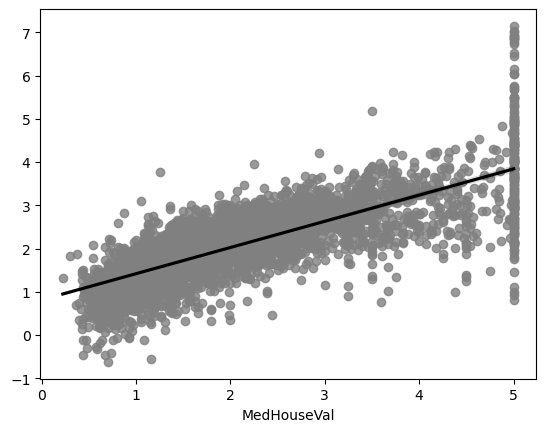

In [11]:
import seaborn as sns
sns.regplot(x=y_test, y=housing_linreg_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})


### Classification and Regression Tree (CART)

In [12]:
%%time
from sklearn.tree import DecisionTreeRegressor
housing_CART = DecisionTreeRegressor()
housing_CART_regression = housing_CART.fit(X_train, y_train)

CPU times: total: 172 ms
Wall time: 2.64 s


In [13]:
%%time
housing_cart_ypred = housing_CART_regression.predict(X_test)

CPU times: total: 0 ns
Wall time: 4.49 ms


CART RMSE

In [14]:
housing_cart_rmse = mean_squared_error(y_true=y_test, y_pred=housing_cart_ypred,squared=False)
print ("CART RMSE is {0:.2f}".format(housing_cart_rmse))


CART RMSE is 0.71


CART R<sup>2</sup>

In [15]:
housing_cart_r2 = housing_CART_regression.score(X_test, y_test)
print("CART Rsquared is {0:.2f}".format(housing_cart_r2))

CART Rsquared is 0.62


<Axes: xlabel='MedHouseVal'>

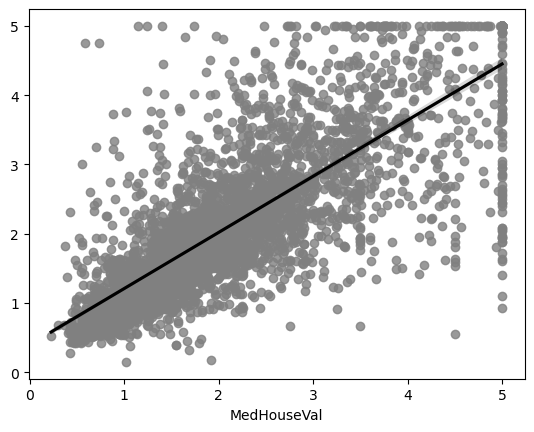

In [16]:
sns.regplot(x=y_test, y=housing_cart_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

In [17]:
# Plotting the tree takes over 20 minutes, uncomment this cell if you'd like to execute it yourself
#from sklearn import tree
#tree.plot_tree(housing_CART)

## Comparing XGBoost to gradient boosting, and random forest

Gradient Boosting in scikit-learn

In [18]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
housing_gbt = GradientBoostingRegressor(random_state=17, max_depth=6)
housing_gbt_regression = housing_gbt.fit(X_train, y_train)

CPU times: total: 6.48 s
Wall time: 12.5 s


In [19]:
%%time
housing_gbt_ypred = housing_gbt_regression.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 19.7 ms


In [20]:
housing_gbt_rmse = mean_squared_error(y_true=y_test, y_pred=housing_gbt_ypred,squared=False)
print ("Gradient boosting regressor RMSE is {0:.2f}".format(housing_gbt_rmse))

Gradient boosting regressor RMSE is 0.49


In [21]:
housing_gbt_r2 = housing_gbt_regression.score(X_test, y_test)
print("Gradient boosting regressor Rsquared is {0:.2f}".format(housing_gbt_r2))

Gradient boosting regressor Rsquared is 0.82


<Axes: xlabel='MedHouseVal'>

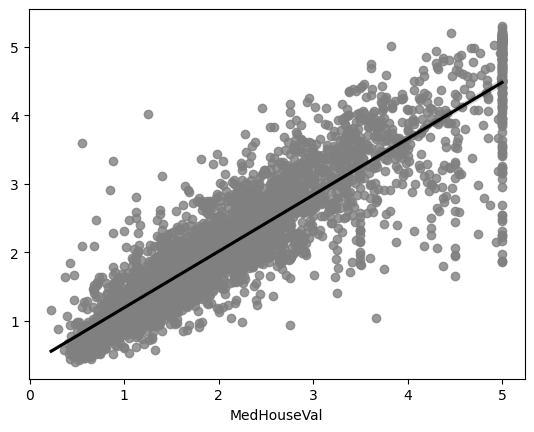

In [22]:
sns.regplot(x=y_test, y=housing_gbt_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

Random forest in scikit-learn

In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor
housing_rf = RandomForestRegressor(random_state=17)
housing_rf_regression = housing_rf.fit(X_train, y_train)

CPU times: total: 13.4 s
Wall time: 19.8 s


In [24]:
%%time
housing_rf_ypred = housing_rf_regression.predict(X_test)

CPU times: total: 62.5 ms
Wall time: 163 ms


In [25]:
housing_rf_rmse = mean_squared_error(y_true=y_test, y_pred=housing_rf_ypred,squared=False)
print ("Random Forest RMSE is {0:.2f}".format(housing_rf_rmse))

Random Forest RMSE is 0.51


In [26]:
housing_rf_r2 = housing_rf_regression.score(X_test, y_test)
print("Random forest Rsquared is {0:.2f}".format(housing_gbt_r2))

Random forest Rsquared is 0.82


<Axes: xlabel='MedHouseVal'>

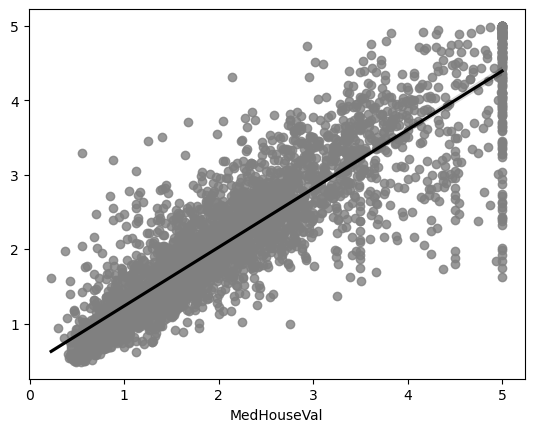

In [27]:
sns.regplot(x=y_test, y=housing_rf_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

## XGBoost model settings and model training 
this code is the same as in Chapter 4 and is repeated here so you can reference the execution time and RMSE and R<sup>2</sup> values

In [28]:
%%time
import xgboost as xgb
from sklearn.metrics import r2_score


housevalue_regressor = xgb.XGBRegressor()

housevalue_regressor.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)])

[0]	validation_0-rmse:1.43189	validation_1-rmse:1.44714
[1]	validation_0-rmse:1.10478	validation_1-rmse:1.10838
[2]	validation_0-rmse:0.88973	validation_1-rmse:0.88158
[3]	validation_0-rmse:0.75846	validation_1-rmse:0.73925
[4]	validation_0-rmse:0.67318	validation_1-rmse:0.64203
[5]	validation_0-rmse:0.62217	validation_1-rmse:0.58077
[6]	validation_0-rmse:0.59688	validation_1-rmse:0.54843
[7]	validation_0-rmse:0.57714	validation_1-rmse:0.51937
[8]	validation_0-rmse:0.56662	validation_1-rmse:0.50360
[9]	validation_0-rmse:0.55806	validation_1-rmse:0.48940
[10]	validation_0-rmse:0.54834	validation_1-rmse:0.47518
[11]	validation_0-rmse:0.54474	validation_1-rmse:0.46667
[12]	validation_0-rmse:0.53838	validation_1-rmse:0.45803
[13]	validation_0-rmse:0.52931	validation_1-rmse:0.44558
[14]	validation_0-rmse:0.52690	validation_1-rmse:0.43937
[15]	validation_0-rmse:0.52538	validation_1-rmse:0.43706
[16]	validation_0-rmse:0.51925	validation_1-rmse:0.42940
[17]	validation_0-rmse:0.51705	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
%%time
y_score = housevalue_regressor.predict(X_test)

CPU times: total: 0 ns
Wall time: 9.61 ms


In [30]:
xgboost_rmse = (mean_squared_error(y_true=y_test, y_pred=y_score))**(1/2)
print("XGBoost RMSE is {0:.2f}".format(xgboost_rmse))

XGBoost RMSE is 0.49


In [31]:
xgboost_r2 = r2_score(y_true=y_test, y_pred= y_score)
print("XGBoost Rsquared is {0:.2f}".format(xgboost_r2))

XGBoost Rsquared is 0.82


<Axes: xlabel='MedHouseVal'>

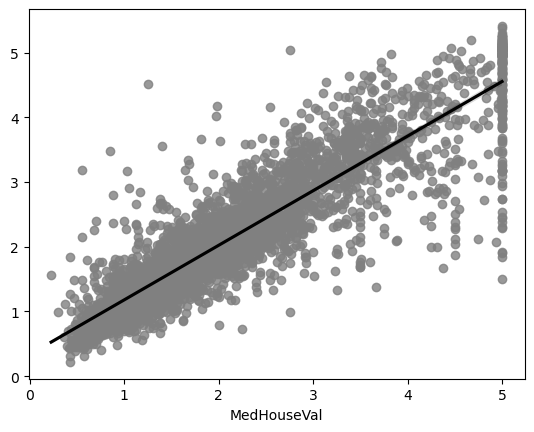

In [32]:
sns.regplot(x=y_test, y=y_score,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

In [33]:
residuals = y_test - y_score
X_testResiduals = pd.concat([X_test, residuals], axis=1)

c:\Users\joyce\anaconda3\envs\xgboost_book_project\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


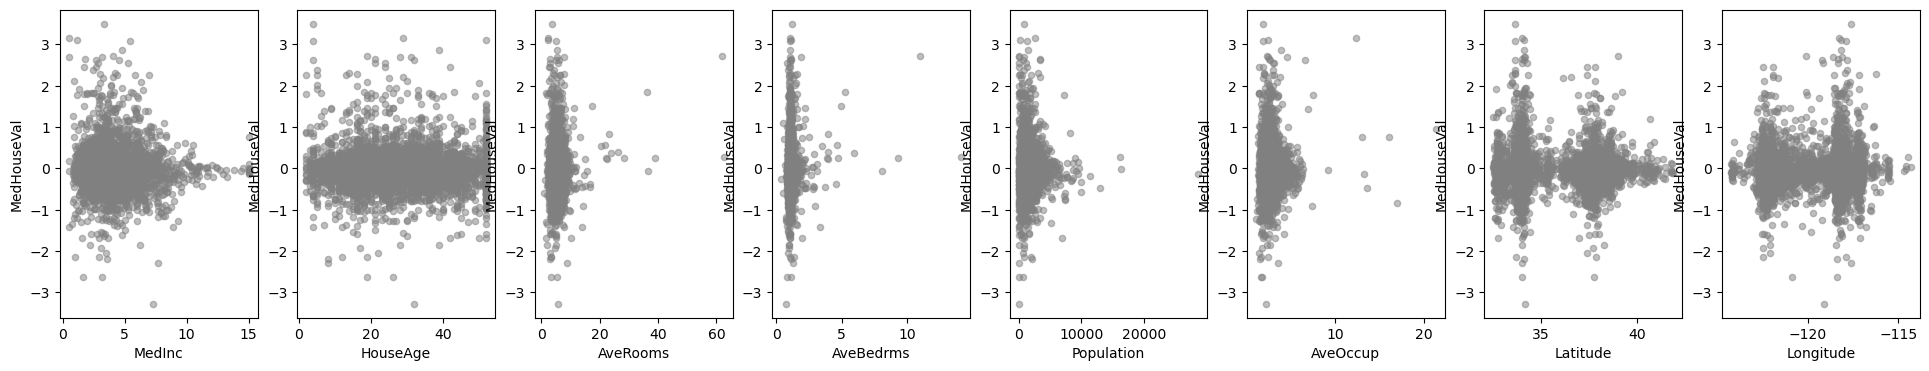

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(24,4))

for xcol, ax in zip(X_test.loc[:].columns,axes):
    X_testResiduals.plot(kind="scatter", x=xcol, y="MedHouseVal", ax=ax, alpha=0.5, color="grey")


Compare gradient boosting preditions to XGBoost predictions

<Axes: >

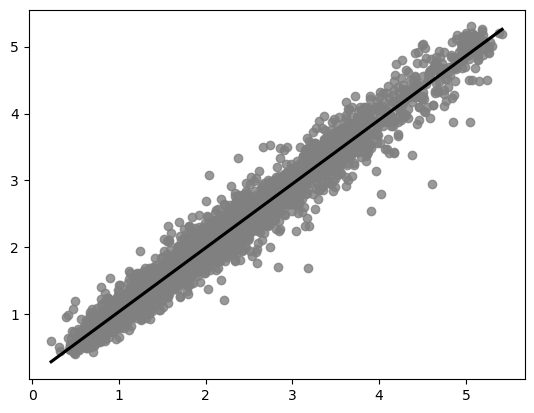

In [36]:
sns.regplot(x=y_score, y=housing_gbt_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

Compare random forest predictions to XGBoost predictions

<Axes: >

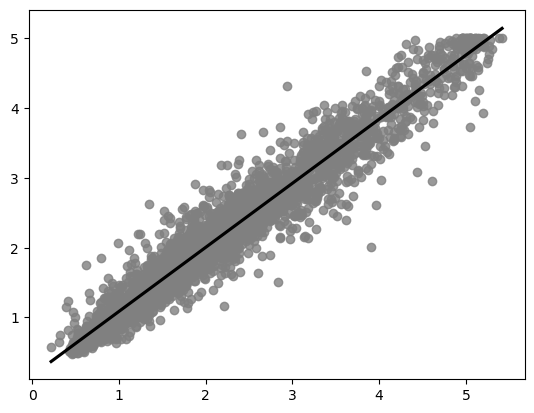

In [37]:
sns.regplot(x=y_score, y=housing_rf_ypred,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})